In [2]:
!pip install pandas matplotlib

  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp311-cp311-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp311-cp311-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 393.8 kB/s eta 0:00:21
   ---------------------------------------- 0.1/8.0 MB 655.4 kB/s eta 0:00:13
    --------------------------------------- 0.2/8.0 MB 952.6 kB/s eta 0:00:

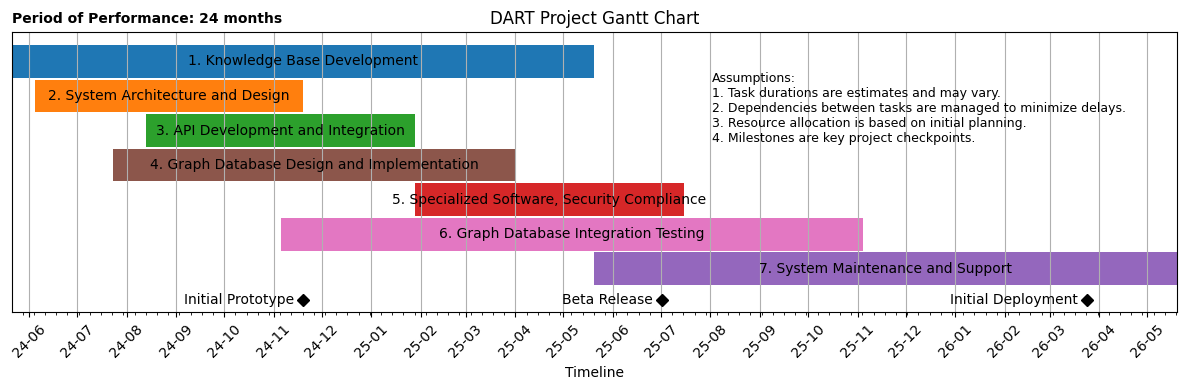

In [110]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Defining the start date of the project
start_date = datetime.today()
end_date = start_date + timedelta(weeks=104)  # Extend to cover 24 months

# Tasks with adjusted durations and start times to cover 24 months
tasks = {
    "1. Knowledge Base Development": {"duration": 52, "start": 0, "color": "tab:blue", "number": 1},
    "2. System Architecture and Design": {"duration": 24, "start": 2, "color": "tab:orange", "number": 2},
    "3. API Development and Integration": {"duration": 24, "start": 12, "color": "tab:green", "number": 3},
    "4. Graph Database Design and Implementation": {"duration": 36, "start": 9, "color": "tab:brown", "number": 4},
    "5. Specialized Software, Security Compliance": {"duration": 24, "start": 36, "color": "tab:red", "number": 5},
    "6. Graph Database Integration Testing": {"duration": 52, "start": 24, "color": "tab:pink", "number": 6},
    "7. System Maintenance and Support": {"duration": 52, "start": 52, "color": "tab:purple", "number": 7}
}

# Milestones
milestones = {
    "Initial Prototype": {"date": start_date + timedelta(weeks=26), "color": "black"},
    "Beta Release": {"date": start_date + timedelta(weeks=58), "color": "black"},
    "Initial Deployment": {"date": start_date + timedelta(weeks=96), "color": "black"}
}

# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(12, 4))
for task, info in sorted(tasks.items(), key=lambda x: x[1]['number'], reverse=True):
    start_task = start_date + timedelta(weeks=info["start"])
    end_task = start_task + timedelta(weeks=info["duration"])
    bar_width = (end_task - start_task).days
    ax.barh(task, bar_width, left=start_task, height=0.95, color=info["color"])  # Adjusted bar width to 0.95
    ax.text(start_task + timedelta(days=bar_width/2), task, task, ha='center', va='center', color='black', fontsize=10)

# Adding milestones at the bottom
milestone_y_position = -0.9  # Position below the lowest task
for milestone, info in milestones.items():
    ax.plot(info["date"], milestone_y_position, 'D', color=info["color"])
    ax.text(info["date"], milestone_y_position, f'{milestone}  ', verticalalignment='center', horizontalalignment='right', color=info["color"])

# Adding Period of Performance (PoP) length
ax.text(start_date, milestone_y_position + 8, 'Period of Performance: 24 months', fontsize=10, fontweight='bold', color='black')

# Adding Assumptions
assumptions = (
    "Assumptions:\n"
    "1. Task durations are estimates and may vary.\n"
    "2. Dependencies between tasks are managed to minimize delays.\n"
    "3. Resource allocation is based on initial planning.\n"
    "4. Milestones are key project checkpoints."
)
plt.gcf().text(.6, .625, assumptions, fontsize=9, va='bottom', ha='left')

# Formatting the plot
ax.set_xlabel("Timeline")
ax.set_xlim([start_date, end_date])  # Set the x-axis to show the full 24 months
ax.set_yticks([])  # Hides the y-axis labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))  # Year as two digits

plt.xticks(rotation=45)
plt.title("DART Project Gantt Chart")
plt.grid(True)
plt.tight_layout()

plt.show()